In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
dic_df = pd.read_excel("/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx")

In [70]:
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [58]:
d_type = df.dtypes
n_unique = df.nunique()
ratio_null = df.isnull().sum() / df.shape[0]
pd.DataFrame({'D_type' : d_type  , 'N_unique' : n_unique , 'Ratio_null' : ratio_null})

,D_type,N_unique,Ratio_null
car_ID,int64,205,0.0
symboling,int64,6,0.0
CarName,object,147,0.0
fueltype,object,2,0.0
aspiration,object,2,0.0
doornumber,object,2,0.0
carbody,object,5,0.0
drivewheel,object,3,0.0
enginelocation,object,2,0.0
wheelbase,float64,53,0.0


In [59]:
numaric_column = df.select_dtypes(include = 'number' ).columns
catagorical_column = df.select_dtypes(include = 'object').columns
print(numaric_column)
print("-----------------------------")
print(catagorical_column)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
-----------------------------
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [60]:
df.duplicated().sum()

0

In [61]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [62]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [63]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

<Axes: >

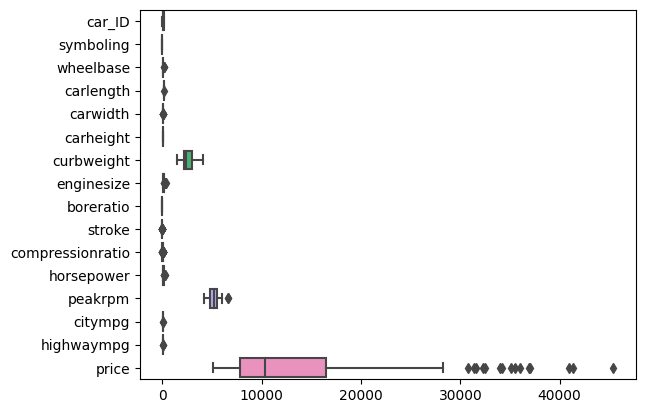

In [64]:
plt.figure()
sns.boxplot(df[numaric_column] , orient = 'h')

In [65]:
from scipy import stats
z_score = np.abs(stats.zscore(df[numaric_column]))
threshold = 3 
mask = (z_score < threshold ).all(axis=1)
df_cleaned = df[mask]


<Axes: >

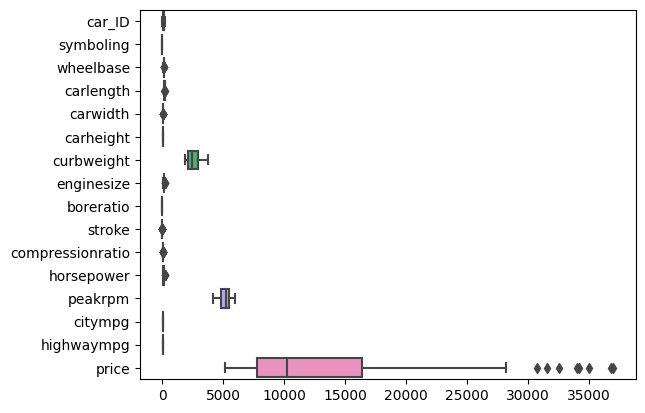

In [66]:
plt.figure()
sns.boxplot(df_cleaned[numaric_column] , orient = 'h')

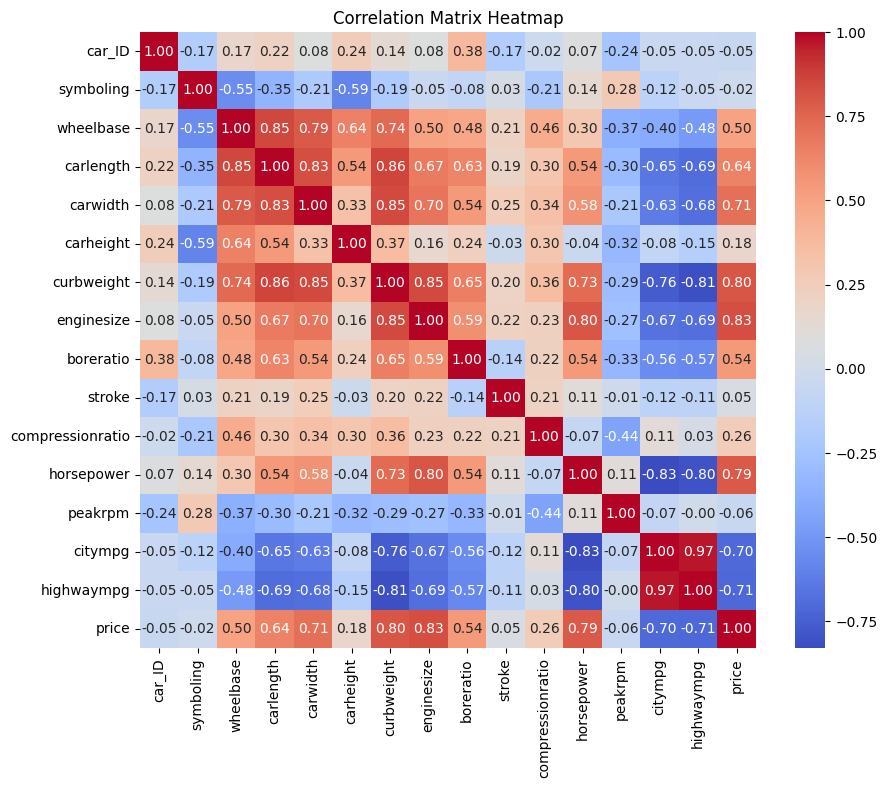

In [67]:
plt.figure(figsize = (10 , 8))
sns.heatmap(df_cleaned[numaric_column].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [68]:
lis = ['highwaympg' ,'citympg' , 'curbweight' , 'carlength'  , 'curbweight' , 'car_ID' , 'stroke' , 'symboling']
new_df = df_cleaned.drop(columns = lis )

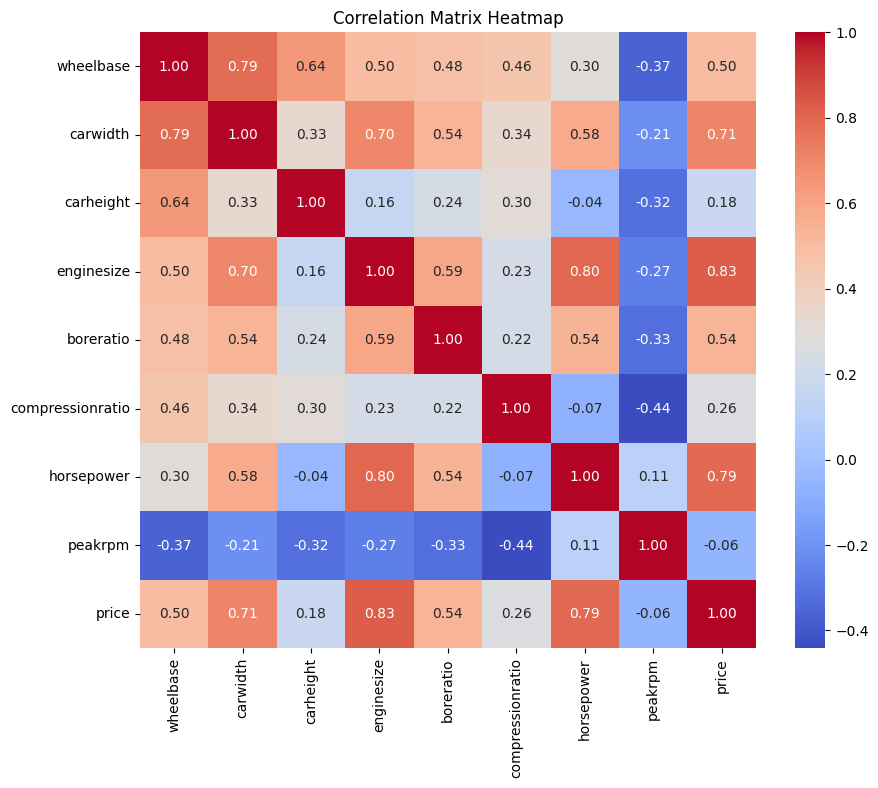

In [69]:
numeric = new_df.select_dtypes(include = 'number' ).columns
plt.figure(figsize = (10 , 8))
sns.heatmap(new_df[numeric].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [77]:
import category_encoders as ce
be = ce.BinaryEncoder(cols = ['CarName' , 'cylindernumber' , 'enginetype' , 'fuelsystem' , 'carbody'])
df_encoded = be.fit_transform(new_df)

In [81]:
df_encoded['fueltype'].replace({'gas' : 0 , 'diesel' : 1 } , inplace = True) 
df_encoded['aspiration'].replace({'std' : 0 , 'turbo' : 1 } , inplace = True) 

df_encoded['doornumber'].replace({'two' : 0 , 'four' : 1 } , inplace = True) 
df_encoded['enginelocation'].replace({'front' : 0 , 'rear' : 1 } , inplace = True) 




/tmp/ipykernel_35/618720860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['fueltype'].replace({'gas' : 0 , 'diesel' : 1 } , inplace = True)
/tmp/ipykernel_35/618720860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['fueltype'].replace({'gas' : 0 , 'diesel' : 1 } , in

In [91]:
df_encoded['drivewheel'].replace({'fwd' : 1 , 'rwd' : 2  , '4wd' : 3} , inplace = True)

/tmp/ipykernel_35/309929105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['drivewheel'].replace({'fwd' : 1 , 'rwd' : 2  , '4wd' : 3} , inplace = True)
/tmp/ipykernel_35/309929105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['drivewheel'].replace({'fwd' : 1 , 'rwd' 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_encoded[numeric])
df_encoded[numeric] = scaler.transform(df_encoded[numeric])

In [93]:
x = df_encoded.drop('price' , axis = 1)
y = df_encoded['price']

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 )

In [95]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train , y_train)



LinearRegression()

In [96]:
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
r2 = r2_score(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.8535
Mean Squared Error: 0.0080
